# Hands on: Handling Missings


### Overview

- [The Data](#ch)</a>

- [Import the file titanicData.csv to a dataframe](#chap_1)</a>

- [Obtain a summary of the data.](#chap_2)</a>

-----------------

[1. Find out how many missing values are represented](#ch_1)</a>

[2. Visualize where are the missings](#ch_2)</a>

[3. Figure out why the data is missing](#ch_3)</a>

[4. Drop features](#ch_4)</a>

[5. Drop rows](#ch_5)</a>

[6. Perform imputation](#ch_6)</a>

   [6.1. Simply impute with an aggregate computed from the remaining non-missing values](#ch_6_1)</a>
   
   [6.2. Impute missings in age according with mean age from groups defined by `sex` and `passenger class`](#ch_6_2)</a>
   
   [Questions](#ch_questions)</a>
   
   [6.3. Replace the column `age` in the datafram df2 with the option you consider more appropriate](#ch_6_3)</a>

[7. Find duplicates](#ch_7)</a>

In [1]:
# to execute and return the results of executions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# The Data <a name="ch"></a>
### The titanic dataset contains information on the survival status of individual passengers on the Titanic 

**Pass_class** - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    
**name**	

**sex**	

**age**	

**sibsp** - Number of Siblings/Spouses Aboard

**parch** - Number of Parents/Children Aboard	

**ticket** - Ticket number	

**fare** - Passenger fare	

**cabin**	- Cabin number	

**embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    
**survived** - Survival status (0 = No, 1 = Yes)


# Import the file titanicData.csv to a dataframe (csv file is available in eLearning). <a name="chap_1"></a>

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("titanicData.csv", sep=';')
df

,Pass_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


### Obtain a summary of the data  <a name="chap_2"></a>

In [3]:
df.describe()
df.describe(include='object')

,Pass_class,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


,name,sex,ticket,cabin,embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


## 1.	Find out how many missing values are represented <a name="ch_1"></a>

In [4]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
print('Missing data objects per feature')
missing_values_count
print('-'*80)

# how many total missing values do we have?
total_missing = missing_values_count.sum() # sum(missing_values_count)
print('Total number of missing values in the dataset = ', total_missing)
NumberObjects = len(df.index)
print('Size of the dataset = ', NumberObjects)
print('-'*80)

# percent of data that is missing
total_cells = np.product(df.shape)
percent_missing = (total_missing/total_cells) * 100
print('percentage of total missing values in the dataset = ', percent_missing)

Missing data objects per feature


Pass_class       0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
survived         0
dtype: int64

--------------------------------------------------------------------------------
Total number of missing values in the dataset =  1280
Size of the dataset =  1309
--------------------------------------------------------------------------------
percentage of total missing values in the dataset =  8.889506215709424


## 2. Visualize where are the missings <a name="ch_2"></a>

<Figure size 1500x2000 with 0 Axes>

<AxesSubplot: >

Text(0.5, 1.0, 'Titanic missing values')

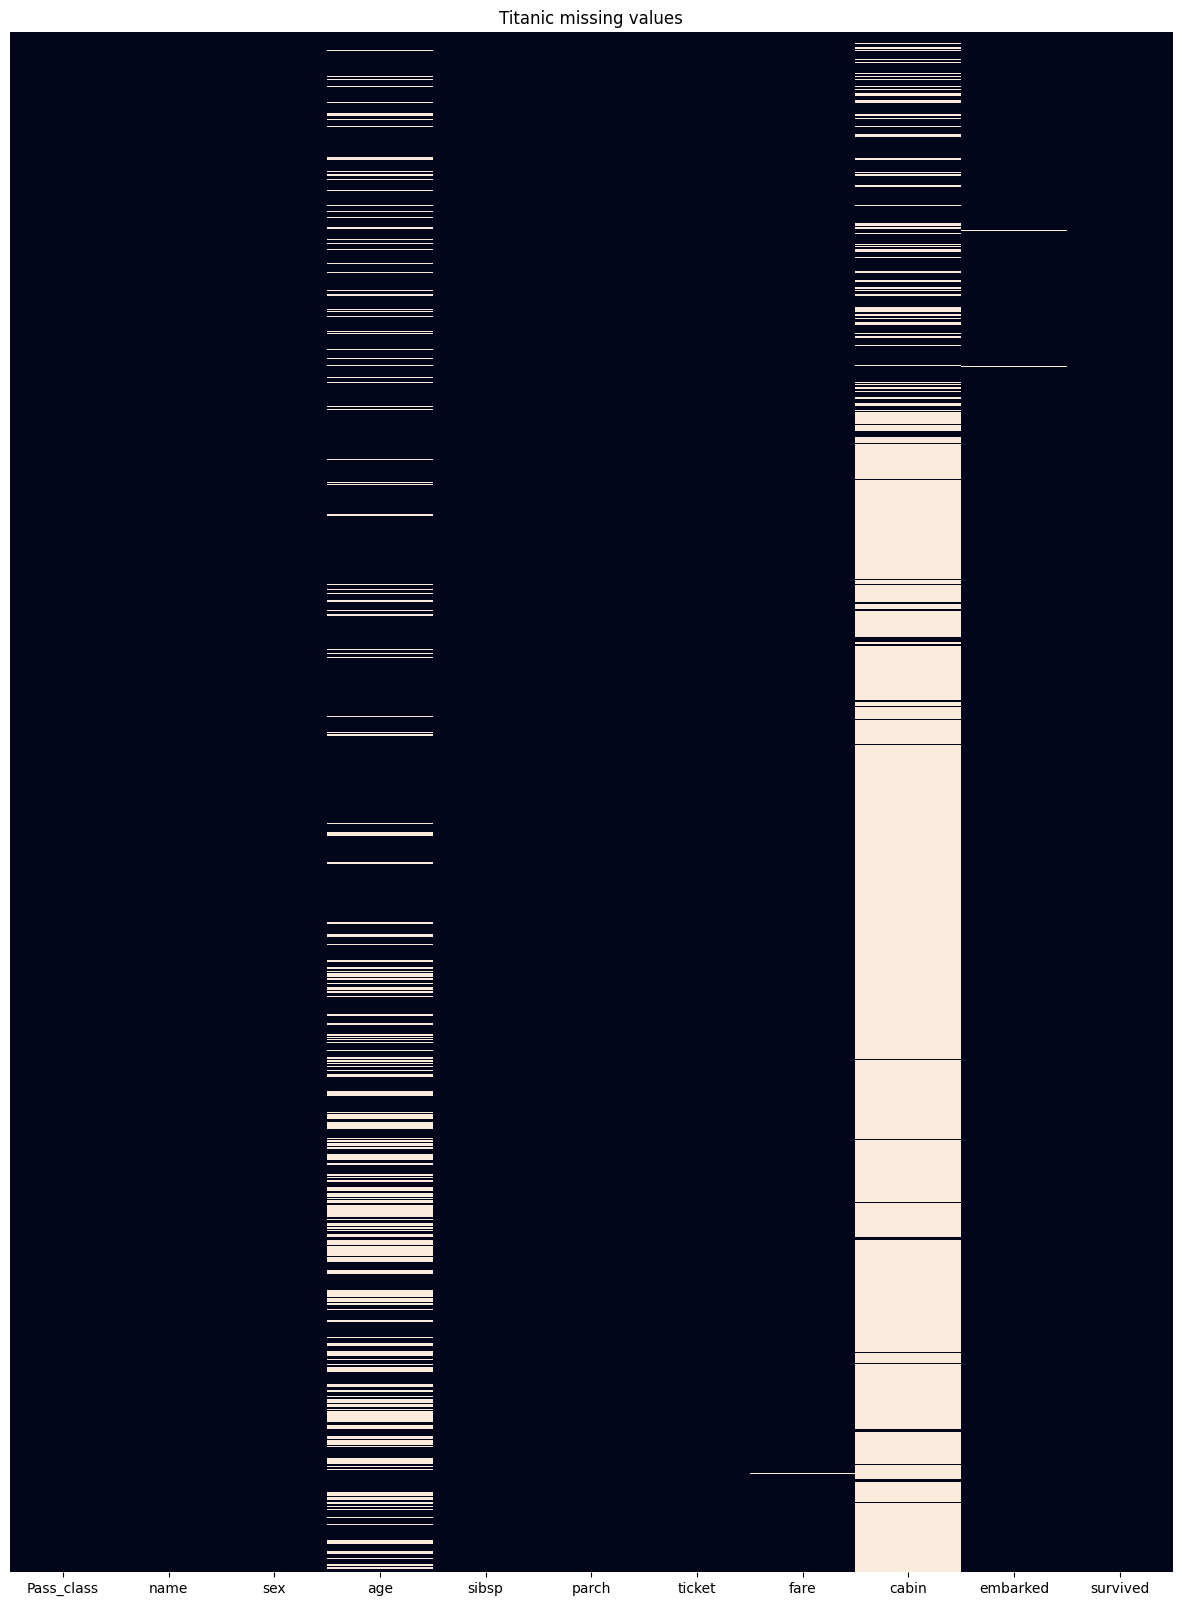

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,20))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False)
plt.title('Titanic missing values')
plt.show()

## 3. Figure out why the data is missing <a name="ch_3"></a>

**Is this value missing because it wasn't recorded (or wasn't introduced in the dataset) or because it doesn't exist?**


***`age`*** : some missing values (263 out of 1309)

***`fare`***: very few missing values (1 out of 1309)

***`embarked`***: very few missing values (2 out of 1309)

***`cabin`***: lot of missing values (1014 out of 1309)


***`age, fare, embarkedage`:*** These values are probably missing because they were not recorded, rather than because they don't exist

* ***`age`:*** perform imputation

* ***`fare, embarkedage`:*** either imputation or dropping the rows with missings

* ***`cabin`:*** Drop the column.

HOWEVER: Keep in mind, that not all of pasenger had cabins! **So most likely these values are missing because feature "cabin" don't apply to those objects (passengers).** 
This will be discussed and addressed in the notebook `Data Preparation`

## 4. Drop features <a name="ch_4"></a>

In [6]:
df2=df.copy()

In [7]:
df2.drop('cabin', axis=1, inplace = True)

## 5. Drop rows <a name="ch_5"></a>

In [8]:
#Drop rows with missing values at specific columns
df2.dropna(subset=['fare', 'embarked'], inplace = True)

## 6. Perform imputation <a name="ch_6"></a>

### 6.1. Simply impute with an aggregate computed from the remaining non-missing values <a name="ch_6_1"></a>

In [9]:
## with df.fillna
# df2['age'].fillna(df2['age'].mean(), inplace=True)
###################
from sklearn.impute import SimpleImputer
# type of imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')# = 'median', 'most_frequent',  ...
# Calculation (transform the dataset)
ImpDataValues_op1 = imputer.fit_transform(df2.age.values.reshape(-1, 1))

print('all missings in age imputed with ', df.age.mean())

all missings in age imputed with  29.8811345124283


### 6.2. Impute missings in age according with mean age from groups defined by `sex` and `Pass_class` <a name="ch_6_2"></a>

**Imputation of missing values by using other related features**

In ***"Hands on: Data Understanding (visualization and summarization)"*** - it is exposed that `age` is related with `sex` and `Pass_class`.
- Impute age using median values for `age` across sets of `sex` and `Pass_class` feature combinations.


In [10]:
ImpDataValues_op2 = df2['age'].fillna(df2.groupby(['sex','Pass_class'])['age'].transform('median'))
#df2['age'].fillna(df2.groupby(['sex','Pass_class'])['age'].transform('mean'),inplace=True)

print('missing values in age imputed according with \n', df2.groupby(['sex','Pass_class'])['age'].median())

missing values in age imputed according with 
 sex     Pass_class
female  1             35.0
        2             28.0
        3             22.0
male    1             42.0
        2             29.5
        3             25.0
Name: age, dtype: float64


### Questions: <a name="ch_questions"></a>
1) which option (6.1 or 6.2) seems more appropriate to impute the missing values in `age`?

2) `fare` attribute has only one missing value. How should you handle the to imputation of this missing value?

### 6.3. Replace the column `age` in the datafram df2 with the option you consider more appropriate<a name="ch_6_3"></a>

In [20]:
#df2.age = ImpDataValues_op1
#or 
df2.age = ImpDataValues_op2

* confirm the number of missings in the dataframe

In [23]:
missing_values_count = df2.isnull().sum()
missing_values_count
print('Total number of missing values in the dataset = ', sum(missing_values_count))
print('Size of the dataset = ', len(df2.index))

Pass_class    0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
survived      0
dtype: int64

Total number of missing values in the dataset =  0
Size of the dataset =  1306


## 7.  Find duplicates <a name="ch_7"></a>

In [24]:
df.duplicated().sum()
df.duplicated(subset=['name']).sum()
df.duplicated()

0

2

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool